In [1]:
import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel("paperboy_instance.xlsx")
df.head()

,name,x,y
0,start,375,375
1,1,17,310
2,2,39,85
3,3,48,403
4,4,49,444


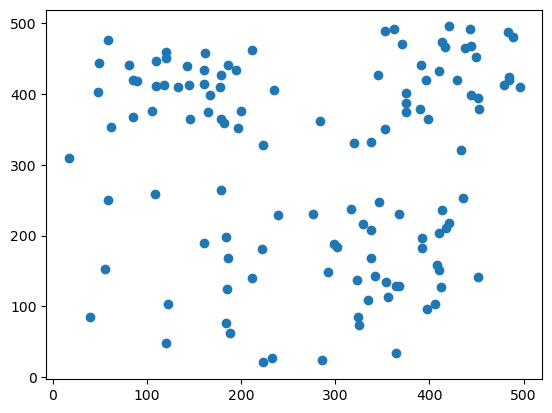

In [2]:
plt.scatter(df["x"], df["y"])

In [22]:
df_links = df[df["x"] <= 125] 
df_midden_l = df[(df["x"] <= 250) & (df["x"] > 125)]
df_midden_r = df[(df["x"] <= 375) & (df["x"] > 250)]
df_rechts = df[(df["x"] > 375)]

row = df.iloc[[0]]
print(row)
df_links = pd.concat([row, df_links])
df_midden_l = pd.concat([row, df_midden_l])
#df_midden_r = pd.concat([row, df_midden_r])
df_rechts =  pd.concat([row, df_rechts])

df_links = df_links.reset_index(drop=True)
df_midden_l = df_midden_l.reset_index(drop=True)
df_midden_r = df_midden_r.reset_index(drop=True)
df_rechts = df_rechts.reset_index(drop=True)

    name    x    y
0  start  375  375


### defining functions

In [23]:
def distance(dataframe): 
    dist = {}
    j = 0
    k = 1
    n = len(dataframe)
    while j < n-1:
        d = abs(dataframe.loc[j,"x"] - dataframe.loc[k,"x"]) + abs(dataframe.loc[j,"y"] - dataframe.loc[k,"y"])
        #d = m.sqrt((df.loc[j, "x"] - df.loc[k, "x"])**2 + (df.loc[j, "y"] - df.loc[k, "y"])**2)
        dist[(j, k)] = d
        dist[(k,j)] = d
        k = k + 1
        if k == n:
            j = j + 1
            #print (j)
            k = j + 1
    #print (dist)
    return dist


In [24]:
def nearest_neighbor(dataframe):
    dist = distance(dataframe)
    #distance(dataframe)
    totaal = 0
    kortste = 1000 
    naar_stad = 0 
    i = 0
    j = [0]
    n = len(dataframe)
    while i < n-1:
        for k in range(n):
            if k not in j:
                afstand = dist[(k,j[i])]
                #print (afstand, j[i], k)
                if afstand < kortste:
                    kortste = afstand
                    naar_stad = k
        if naar_stad == None:
            naar_stad = j[0]
            #print(j[34])
            kortste = dist[(j[n-1],j[0])]
            print(kortste)
        j.append(naar_stad)
        #print(f'vanaf punt {j[i]} is punt {j[i+1]} het dichtste bij')
        totaal = totaal + kortste
        #print (f'de totale afstand is {totaal}, en de afstand van het vorige punt naar dit punt is {kortste}')
        i = i + 1
        kortste = 1000
        k = 0
        naar_stad = None
    print (j)
    print(f'de totale afstand is {totaal}')
    return j

In [26]:
import matplotlib.pyplot as plt

def plot_route(dataframe):
    route = nearest_neighbor(dataframe)
    x = dataframe["x"]
    y = dataframe["y"]

    # Plot alle punten
    plt.scatter(x, y, c="blue", s=50, label="Punten")

    # Labels bij punten
    for idx, (xi, yi) in enumerate(zip(x, y)):
        plt.text(xi+0.1, yi+0.1, str(idx), fontsize=9)

    # Route tekenen
    route_x = [dataframe.loc[i, "x"] for i in route]
    route_y = [dataframe.loc[i, "y"] for i in route]

    plt.plot(route_x, route_y, c="red", linewidth=2, label="Route")
    plt.scatter(route_x[0], route_y[0], c="green", s=100, label="Start")
    plt.scatter(route_x[-1], route_y[-1], c="orange", s=100, label="Einde")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Route met Nearest Neighbor")
    plt.legend()
    plt.grid(True)
    plt.show()


In [27]:
def route_lengte(dataframe, lijst):
    dist = distance(dataframe)
    n = len(dataframe)
    print(n)
    totale_afstand = 0
    for i in range (n-1):
        afstand = dist[(lijst[i],lijst[i+1])]
        totale_afstand += afstand
    print (totale_afstand)
    return

In [28]:
import matplotlib.pyplot as plt

def plot_verbeterde_route(dataframe, route):
    x = dataframe["x"]
    y = dataframe["y"]

    # Plot alle punten
    plt.scatter(x, y, c="blue", s=50, label="Punten")

    # Labels bij punten
    for idx, (xi, yi) in enumerate(zip(x, y)):
        plt.text(xi+0.1, yi+0.1, str(idx), fontsize=9)

    # Route tekenen
    route_x = [dataframe.loc[i, "x"] for i in route]
    route_y = [dataframe.loc[i, "y"] for i in route]

    plt.plot(route_x, route_y, c="red", linewidth=2, label="Route")
    plt.scatter(route_x[0], route_y[0], c="green", s=100, label="Start")
    plt.scatter(route_x[-1], route_y[-1], c="orange", s=100, label="Einde")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Route met Nearest Neighbor")
    plt.legend()
    plt.grid(True)
    plt.show()


### plotten, test 1 

[0, 13, 10, 8, 3, 4, 9, 11, 12, 15, 17, 19, 20, 16, 7, 1, 6, 14, 5, 2, 21, 18]
de totale afstand is 1467


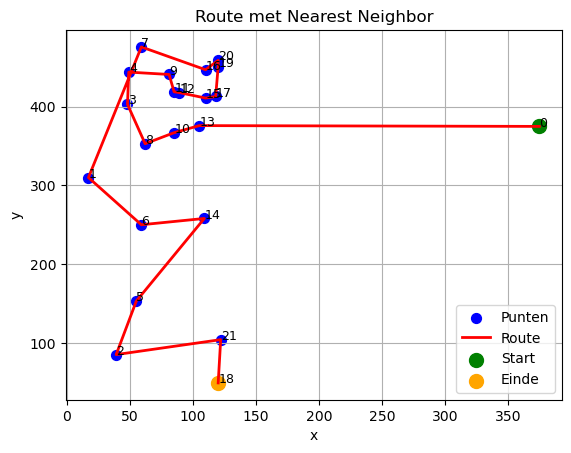

In [29]:
plot_route(df_links)
#[0, 13, 10, 8, 11, 12, 15, 17, 19, 20, 16, 9, 7, 4, 3, 1, 6, 14, 5, 2, 21, 18]

[0, 31, 11, 14, 20, 22, 7, 6, 3, 1, 2, 8, 25, 24, 23, 15, 13, 9, 10, 4, 29, 12, 17, 5, 19, 18, 26, 27, 32, 16, 21, 28, 30]
de totale afstand is 1654


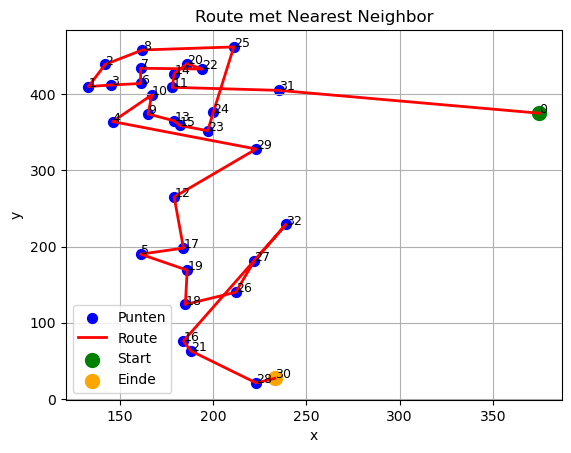

In [30]:
plot_route(df_midden_l)
# [0, 31, 25, 8, 2, 1, 3, 6, 7, 20, 22, 14, 11, 10, 4, 9, 13, 15, 23, 24, 29, 12, 17, 5, 19, 18, 16, 21, 26, 27, 32, 30, 28]

[0, 30, 31, 18, 21, 24, 29, 20, 16, 8, 2, 1, 7, 12, 15, 14, 17, 22, 25, 27, 23, 13, 10, 11, 9, 4, 6, 5, 19, 28, 26, 3]
de totale afstand is 1488


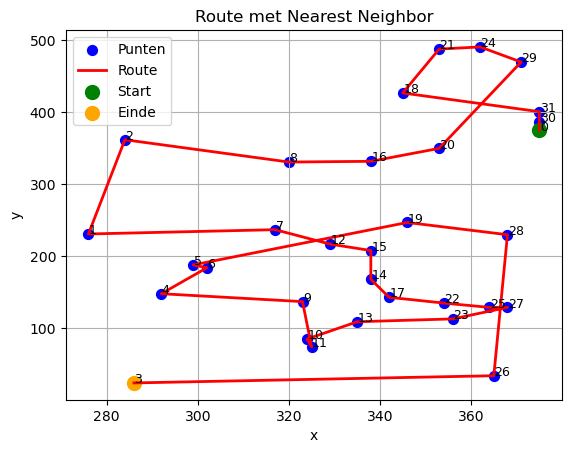

In [31]:
plot_route(df_midden_r)


[0, 1, 7, 5, 2, 12, 20, 25, 29, 30, 31, 34, 33, 36, 35, 32, 24, 26, 23, 16, 15, 19, 27, 21, 22, 14, 18, 17, 11, 4, 3, 9, 10, 13, 8, 6, 28]
de totale afstand is 1225


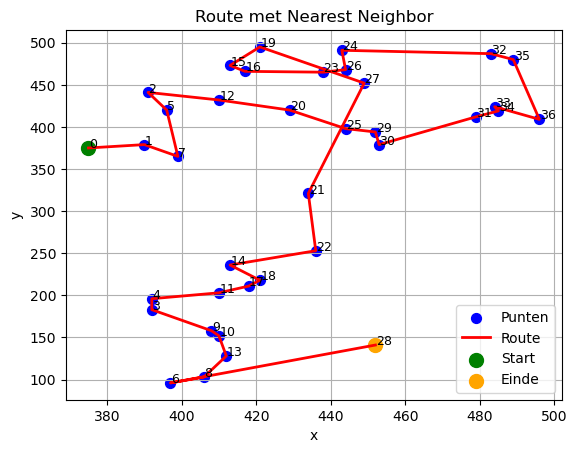

In [32]:
plot_route(df_rechts)

### test met verbeterde route

In [33]:
L = [0, 31, 25, 8, 2, 1, 3, 6, 7, 20, 22, 14, 11, 10, 4, 9, 13, 15, 23, 24, 29, 12, 17, 5, 19, 18, 16, 21, 26, 27, 32, 30, 28]
route_lengte(df_midden_l, L)

33
1586


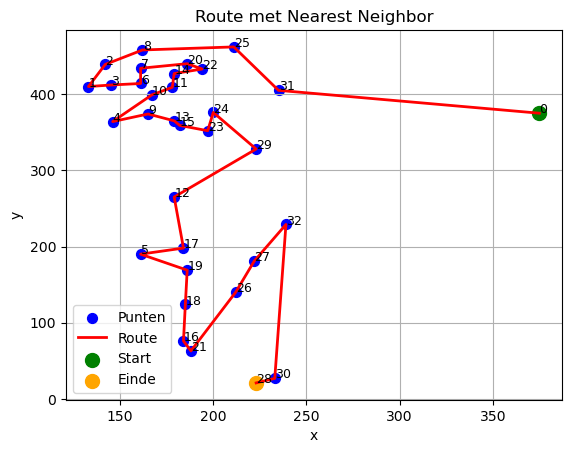

In [34]:
plot_verbeterde_route(df_midden_l, L)